# Importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [7]:
data = pd.read_csv('F:\Git\datasets_228_482_diabetes.csv')

In [8]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Feature Selection

In [10]:
corr = data.corr()


<Figure size 1440x1440 with 0 Axes>

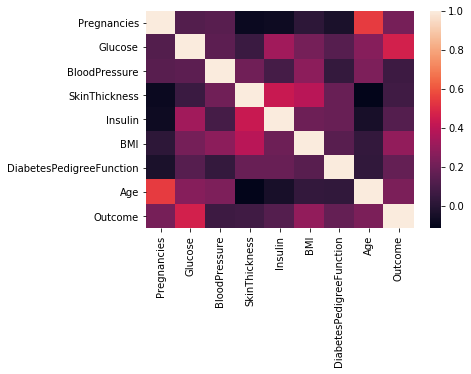

<Figure size 1440x1440 with 0 Axes>

In [11]:
sns.heatmap(corr)
plt.figure(figsize=(20,20))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002805BDE8E48>,
      dtype=object)

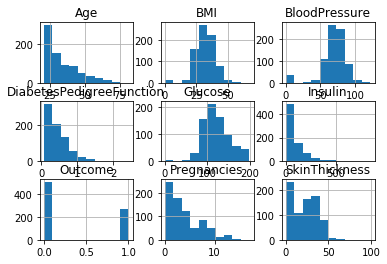

In [12]:
data.hist()

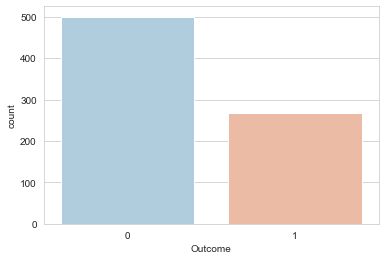

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=data,palette='RdBu_r')

In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Processing

In [15]:
dataset = pd.get_dummies(data, columns = ['Glucose','SkinThickness','BMI','Age'])


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['Pregnancies','BloodPressure','Insulin','DiabetesPedigreeFunction']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [17]:
dataset.head()

,Pregnancies,BloodPressure,Insulin,DiabetesPedigreeFunction,Outcome,Glucose_0,Glucose_44,Glucose_56,Glucose_57,Glucose_61,...,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70,Age_72,Age_81
0,0.639947,0.149641,-0.692891,0.468492,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.844885,-0.160546,-0.692891,-0.365061,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.233880,-0.263941,-0.692891,0.604397,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.844885,-0.160546,0.123302,-0.920763,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.141852,-1.504687,0.765836,5.484909,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# K Neighbors Classifier

In [18]:
y = dataset['Outcome']
X = dataset.drop(['Outcome'], axis = 1)

In [21]:

from sklearn.neighbors import KNeighborsClassifier

In [24]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,11):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

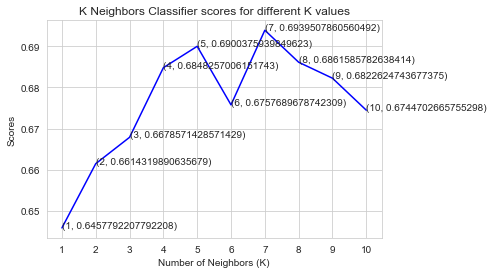

In [26]:
plt.plot([k for k in range(1, 11)], knn_scores, color = 'blue')
for i in range(1,11):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)


In [29]:
score.mean()

0.6835611756664388

# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [57]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [58]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.671875

# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [62]:
score.mean()

0.6861585782638414